In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"D:\Study\BA\covid.xlsx",index_col="Date",parse_dates=["Date"])

In [3]:
df.tail(1)

,Daily Confirmed
Date,
2021-08-05,45005


In [4]:
df["Daily Confirmed"].tail()

Date
2021-08-01    40629
2021-08-02    30085
2021-08-03    42530
2021-08-04    42797
2021-08-05    45005
Name: Daily Confirmed, dtype: int64

In [5]:
df.describe()

,Daily Confirmed
count,278.000000
mean,85151.982014
std,106628.285948
min,8579.000000
25%,19056.250000
50%,41593.000000
75%,85496.500000
max,414280.000000


<AxesSubplot:xlabel='Date'>

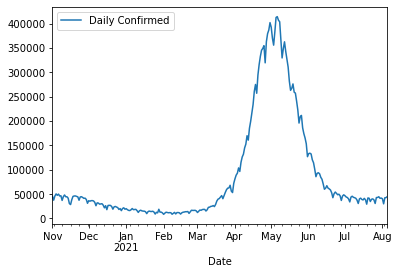

In [6]:
df.plot()

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
dtest = adfuller(df)
print('P-Value: %f' % dtest[1])

P-Value: 0.047018


In [9]:
ts_log = np.log(df)

In [10]:
ts_log_diff = ts_log - ts_log.shift(1)
ts_log_diff = ts_log_diff.dropna(axis=0)

<AxesSubplot:xlabel='Date'>

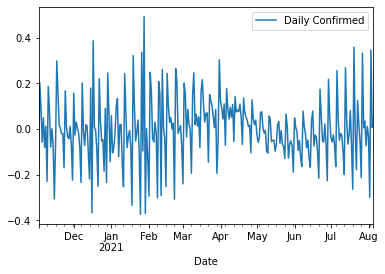

In [11]:
ts_log_diff.dropna().plot()

In [12]:
ts_log_diffS = ts_log - ts_log.shift(30)
ts_log_diffS = ts_log_diff.dropna(axis=0)

<AxesSubplot:xlabel='Date'>

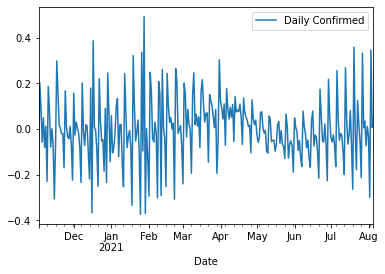

In [13]:
ts_log_diffS.plot()

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

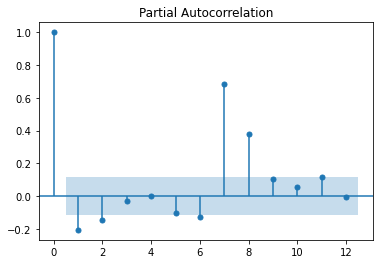

In [15]:
PACF = plot_pacf(ts_log_diff,lags=12)

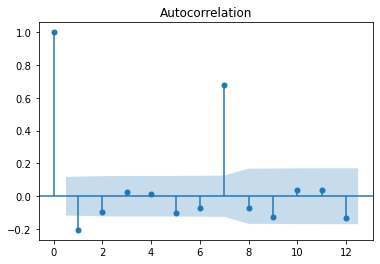

In [16]:
ACF = plot_acf(ts_log_diff,lags=12)

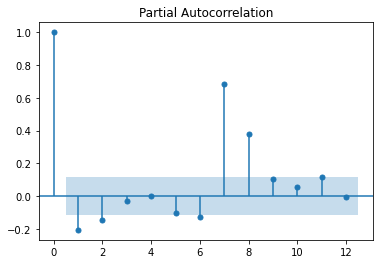

In [17]:
PACF = plot_pacf(ts_log_diffS,lags=12)

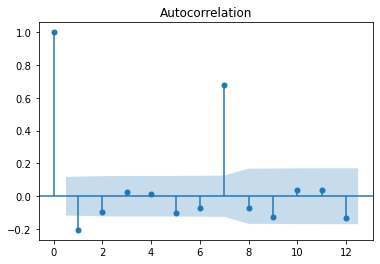

In [18]:
ACF = plot_acf(ts_log_diffS,lags=12)

In [19]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=0.10,shuffle=False)

In [21]:
#model=sm.tsa.statespace.SARIMAX(endog=train,order=(7, 1, 7),seasonal_order=(7, 1, 7, 30),enforce_stationarity=True,enforce_invertibility=True,trend="n",simple_differencing=False,n_jobs=-1)

In [51]:
model=sm.tsa.statespace.SARIMAX(endog=train,order=(7, 1, 8),seasonal_order=(7, 1, 8, 30),enforce_stationarity=True,enforce_invertibility=True,trend="n",simple_differencing=False,n_jobs=-1)
results=model.fit()

In [52]:
prediction = results.forecast(steps=28)

In [53]:
prediction.head()

2021-07-09    37099.603539
2021-07-10    38016.020209
2021-07-11    32464.909069
2021-07-12    27872.520500
2021-07-13    36602.595280
Freq: D, Name: predicted_mean, dtype: float64

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_true=test,y_pred=prediction)
mae = mean_absolute_error(y_true=test,y_pred=prediction)
rmse = np.sqrt(mse)
print('MAE: %f'%mae)
print('RMSE: %f'%rmse)
print('MSE: %f'%mse)

MAE: 3571.344541
RMSE: 4645.656217
MSE: 21582121.684641


In [55]:
#Q = ts.resample('Q').sum()

In [56]:
ts = pd.DataFrame(df)

In [57]:
from pandas.tseries.offsets import DateOffset
pred_dates=pd.Series(pd.date_range("8/5/2021", freq="D", periods=50))
pred_dates_ts=pd.DataFrame(index=pred_dates[1:],columns=ts.columns)

In [58]:
pred = pd.concat([ts,pred_dates_ts])
pred['forecast'] = results.forecast(steps=100)

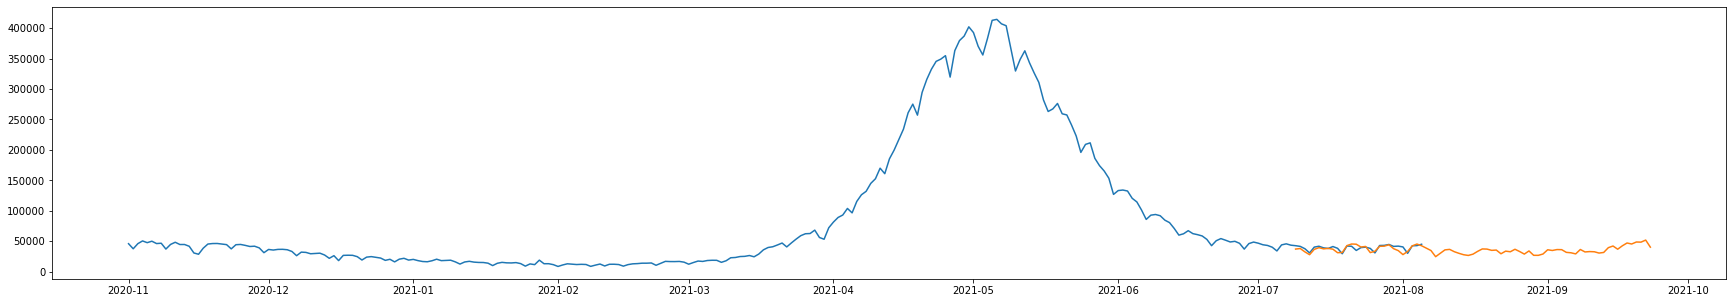

In [59]:
plt.figure(figsize=(30,5))
plt.plot(pred['Daily Confirmed'])
plt.plot(pred['forecast'])

In [60]:
pred['forecast'] = pred['forecast'].apply(np.ceil)

In [61]:
pred.iloc[250:290]

,Daily Confirmed,forecast
2021-07-09,42660,37100.0
2021-07-10,41494,38017.0
2021-07-11,37654,32465.0
2021-07-12,30818,27873.0
2021-07-13,40314,36603.0
2021-07-14,41759,39430.0
2021-07-15,39071,37449.0
2021-07-16,38117,38264.0
2021-07-17,41283,36885.0
2021-07-18,38330,31129.0


In [62]:
pred.to_excel("COVID NEW.xlsx")